# Part 1.2 - Rule Based Sentiment Analysis

Using vader to conduct a rule-based sentiment analysis on google play and apple store reviews.

Reference: https://towardsdatascience.com/rule-based-sentiment-analysis-of-app-store-review-in-python-94d8bbfc48bb

In [9]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## 1. Preparation - Initialisation and Importing files

In [4]:
# Initialisation
analyzer = SentimentIntensityAnalyzer()

# import data files
gps_review_df = pd.read_csv('gps_reviews.csv')
apple_review_df = pd.read_csv('applestore_reviews.csv')

In [5]:
gps_review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
0,gp:AOqpTOFYKNVxBBxG7vqoXp4hRLFNUTKSzoP70viEk_F...,আশার আলো HM,https://play-lh.googleusercontent.com/a-/AOh14...,Nc,5,0,NaN,2021-08-28 13:48:22,NaN,NaN,Syfe,com.syfe
1,gp:AOqpTOGSZWRpWt-hegeL1ADDSgKB6xt3el3np0MBo8u...,Wyman Hor,https://play-lh.googleusercontent.com/a-/AOh14...,"Need to fix the ""use pin or fingerprint"" optio...",3,0,4.72,2021-08-27 20:25:45,NaN,NaN,Syfe,com.syfe
2,gp:AOqpTOEzm47XFJ4DwmGTKpYMAa-P-PuzCjJXlIae4aT...,Chris Wong,https://play-lh.googleusercontent.com/a-/AOh14...,"Very poor investment return, many month still ...",3,5,4.6,2021-08-27 13:22:08,NaN,NaN,Syfe,com.syfe
3,gp:AOqpTOHpibS6PD8igC-y3Eob_3WDqdlMWU3Fa_pCPFe...,Naeem Ali,https://play-lh.googleusercontent.com/a/AATXAJ...,I am from UAE I am trying to create a account ...,1,0,4.72,2021-08-23 02:00:48,NaN,NaN,Syfe,com.syfe
4,gp:AOqpTOH1M99aktXprTLr5Xh5fUjd0ECVKlTmazW9auI...,Muhammad Nurhaikal,https://play-lh.googleusercontent.com/a/AATXAJ...,There have been several updates released that ...,4,32,4.72,2021-08-21 08:25:25,NaN,NaN,Syfe,com.syfe


In [6]:
apple_review_df.head()

,userName,rating,title,date,review,isEdited,app_name,app_id,developerResponse
0,jayden_reviews,4,"Generally satisfied, but could be better if..",2021-04-02 05:57:56,1. The portfolio “card user interface” can be ...,False,syfe-invest-better,1497156434,NaN
1,Andy lx,4,App is buggy,2021-04-08 05:05:56,This hybrid app is quite buggy compared Stasha...,False,syfe-invest-better,1497156434,NaN
2,BestAjay,1,Slow backend processing and lack of transparency,2021-08-19 08:38:24,The app and website is just a bunch of fake li...,False,syfe-invest-better,1497156434,NaN
3,TYY1234567,5,App’s looking great!,2021-07-09 12:54:20,The app looks fantastic and it’s so fresh with...,False,syfe-invest-better,1497156434,NaN
4,Kalaichelvan.a,4,Unable to open App after update,2020-04-22 05:09:46,"Hi there,\n\nThe app checks for latest version...",False,syfe-invest-better,1497156434,NaN


In [10]:
# Function to return sentiment based on input text. Sentiment label consist of:
# Positive - (2)
# Neutral - (1)
# Negative - (0)
# Junk - (-1)
def calc_vader_sentiment(text):
    sentiment = 'Neutral'
    vs = analyzer.polarity_scores(str(text))
    compound = vs['compound']
    if(compound == 0):
        sentiment = 'Junk'
    elif(compound >= 0.05):
        sentiment = 'Positive'
    elif(compound <= -0.05):
        sentiment = 'Negative'
    return sentiment

## 2. Processing review data

In [11]:
# Process reviews from Syfe
gps_syfe = gps_review_df.loc[gps_review_df['app_name'] =='Syfe'] # Subset gps reviews for Syfe
gps_syfe = gps_syfe[['content']] # Subset only 'content' columns

apple_syfe = apple_review_df.loc[apple_review_df['app_name'] == 'syfe-invest-better'] # Subset apple reviews for Syfe
apple_syfe = apple_syfe['review'] # Subset only 'review' columns

syfe_reviews = pd.concat([gps_syfe,apple_syfe]) # concat syfe review contents

# Process reviews from Endowus
gps_endowus = gps_review_df.loc[gps_review_df['app_name'] =='Endowus'] # Subset gps reviews for Endowus
gps_endowus = gps_endowus[['content']] # Subset only 'content' columns

apple_endowus = apple_review_df.loc[apple_review_df['app_name'] == 'endowus-invest-cpf-srs-cash'] # Subset apple reviews for Endowus
apple_endowus = apple_endowus['review'] # Subset only 'review' columns

endowus_reviews = pd.concat([gps_endowus,apple_endowus]) # concat Endowus review contents

# Process reviews from StashAway
gps_stashaway = gps_review_df.loc[gps_review_df['app_name'] =='StashAway'] # Subset gps reviews for StashAway
gps_stashaway = gps_stashaway[['content']] # Subset only 'content' columns

apple_stashaway = apple_review_df.loc[apple_review_df['app_name'] == 'stashaway-invest-and-save'] # Subset apple reviews for StashAway
apple_stashaway = apple_stashaway['review'] # Subset only 'review' columns

stashaway_reviews = pd.concat([gps_stashaway,apple_stashaway]) # concat Endowus review contents

## 3. Implementing

In [12]:
# Calculate sentiment score for Syfe reviews
syfe_sentiment = pd.DataFrame({
    'uid': list(syfe_reviews.index.values),
    'text': syfe_reviews['content'],
    'label': [calc_vader_sentiment(x) for x in syfe_reviews['content']]
})

# Calculate sentiment score for Endowus reviews
endowus_sentiment = pd.DataFrame({
    'uid': list(endowus_reviews.index.values),
    'text': endowus_reviews['content'],
    'label': [calc_vader_sentiment(x) for x in endowus_reviews['content']]
})

# Calculate sentiment score for StashAway reviews
stashaway_sentiment = pd.DataFrame({
    'uid': list(stashaway_reviews.index.values),
    'text': stashaway_reviews['content'],
    'label': [calc_vader_sentiment(x) for x in stashaway_reviews['content']]
})

## 4. Post-processing Results

In [13]:
# Create function to calculate percentage
def calc_perc (x,total):
    y = (x/total)*100
    return y

## Note: Can probably refine this to a loop
# Processing Syfe results
syfe_labels = pd.DataFrame(syfe_sentiment.groupby(by='label').size(),columns=['count']) # Breakdown by label and count, convert to dataframe
syfe_labels.reset_index(level=0, inplace=True) # Convert index to column
syfe_count = sum(syfe_labels['count']) # Calculate total counts
syfe_labels['perc'] = syfe_labels['count'].apply(lambda x: round(calc_perc(x,syfe_count))) # Create new column with count percentage
syfe_labels['app'] = 'syfe' # Create new column to indicate app

# Processing Endowus results
endowus_labels = pd.DataFrame(endowus_sentiment.groupby(by='label').size(),columns=['count'])
endowus_labels.reset_index(level=0, inplace=True)
endowus_count = sum(endowus_labels['count']) # Calculate total counts
endowus_labels['perc'] = endowus_labels['count'].apply(lambda x: round(calc_perc(x,endowus_count))) # Create new column with count percentage
endowus_labels['app'] = 'endowus'

stashaway_labels = pd.DataFrame(stashaway_sentiment.groupby(by='label').size(),columns=['count'])
stashaway_labels.reset_index(level=0, inplace=True)
stashaway_count = sum(stashaway_labels['count']) # Calculate total counts
stashaway_labels['perc'] = stashaway_labels['count'].apply(lambda x: round(calc_perc(x,stashaway_count))) # Create new column with count percentage
stashaway_labels['app'] = 'stashaway'

all_labels = pd.concat([syfe_labels,endowus_labels,stashaway_labels])
all_labels

,label,count,perc,app
0,Junk,85,50,syfe
1,Negative,24,14,syfe
2,Neutral,1,1,syfe
3,Positive,60,35,syfe
0,Junk,72,37,endowus
1,Negative,4,2,endowus
2,Neutral,1,1,endowus
3,Positive,118,61,endowus
0,Junk,505,31,stashaway
1,Negative,84,5,stashaway


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Percentage Score (%)')

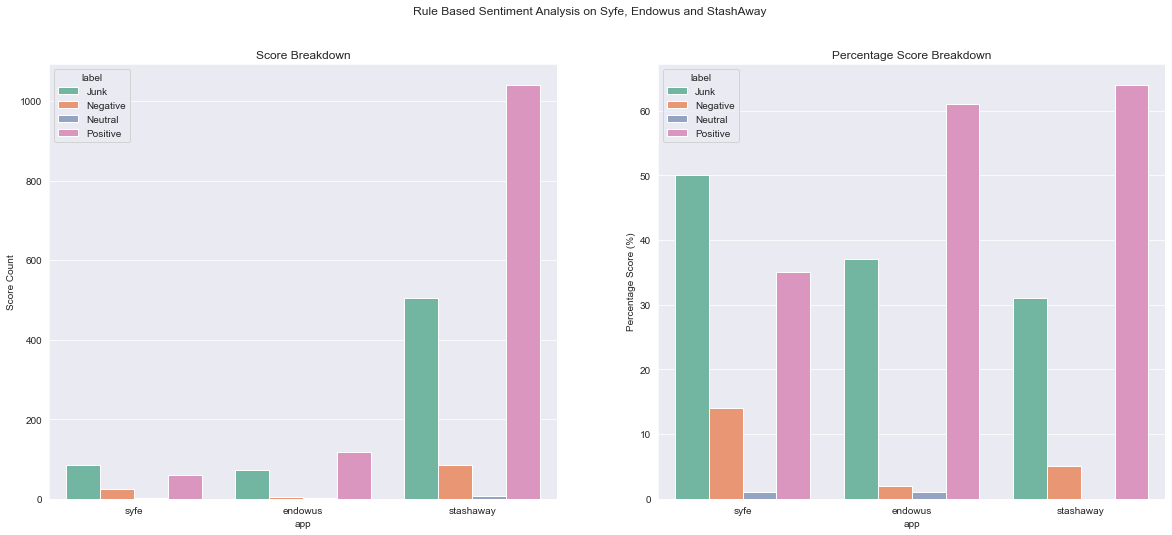

In [15]:
sns.set_style( 'darkgrid' )
col = sns.color_palette("Set2")
fig, axes = plt.subplots(1,2,figsize=[20,8])
fig.suptitle('Rule Based Sentiment Analysis on Syfe, Endowus and StashAway')

## Plot 1
sns.barplot(ax=axes[0],data=all_labels,x='app',y='count',hue='label', palette=col)
axes[0].set_title('Score Breakdown')
axes[0].set_ylabel('Score Count')

## Plot 2
sns.barplot(ax=axes[1],data=all_labels,x='app',y='perc',hue='label', palette=col)
axes[1].set_title('Percentage Score Breakdown')
axes[1].set_ylabel('Percentage Score (%)')

## Results Analysis

An interesting observation across all 3 apps is that the reviews are skewed towards the extremes (positive and junk). This is expected as users that provide app reviews are likely to be either extremely satisfied or dissatisfied, and are inclined to provide a review of their experiences. 

Looking purely at score breakdowns from the first chart (left), it appears that StashAway has much more positive reviews than Endowus and Syfe. The same could be said for its unpopularity as well given that it also has the highest number of junk scores. 

A better metric could instead be looking at their percentage score sincee this is more representive of its relative popularity. This is demonstrated in the second chart (right) where score breakdowns are computed as a relative percentage of the whole. The results reveal that StashAway is also highly popular with the highest positive score than the rest while having the least junk scores, plausibly suggesting that StashAway is the most popular roboadvisor app in Singapore. 